# SKIN LESION IMAGES FOR MELANOMA CLASSIFICATION

Importing dependencies

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
image_data ="ISIC_2019_Training_Input/ISIC_2019_Training_Input/"
csv_data ="ISIC_2019_Training_GroundTruth.csv"
meta_data= "ISIC_2019_Training_Metadata.csv"

In [3]:
df_csv= pd.read_csv(csv_data)
df_meta= pd.read_csv(meta_data)

In [4]:
df_csv.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_meta.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [6]:
df_meta["lesion_id"].isnull().sum()

2084

In [7]:
df_meta["lesion_id"].value_counts()

lesion_id
BCN_0001728    31
BCN_0003369    27
BCN_0001321    26
BCN_0003196    24
BCN_0001954    21
               ..
HAM_0004752     1
HAM_0000667     1
HAM_0000240     1
HAM_0003075     1
BCN_0001014     1
Name: count, Length: 11847, dtype: int64

In [8]:
# load images
path,dirs,files= next(os.walk(image_data))
filecount=len(files)
print("Number of images are ",filecount)


Number of images are  25332


In [9]:
file_names= os.listdir(image_data)
# file_names

In [10]:
print(file_names[:20])

['ISIC_0000000.jpg', 'ISIC_0000001.jpg', 'ISIC_0000002.jpg', 'ISIC_0000003.jpg', 'ISIC_0000004.jpg', 'ISIC_0000006.jpg', 'ISIC_0000007.jpg', 'ISIC_0000008.jpg', 'ISIC_0000009.jpg', 'ISIC_0000010.jpg', 'ISIC_0000011.jpg', 'ISIC_0000012.jpg', 'ISIC_0000013.jpg', 'ISIC_0000014.jpg', 'ISIC_0000015.jpg', 'ISIC_0000016.jpg', 'ISIC_0000017_downsampled.jpg', 'ISIC_0000018_downsampled.jpg', 'ISIC_0000019_downsampled.jpg', 'ISIC_0000020_downsampled.jpg']


(767, 1022, 3)


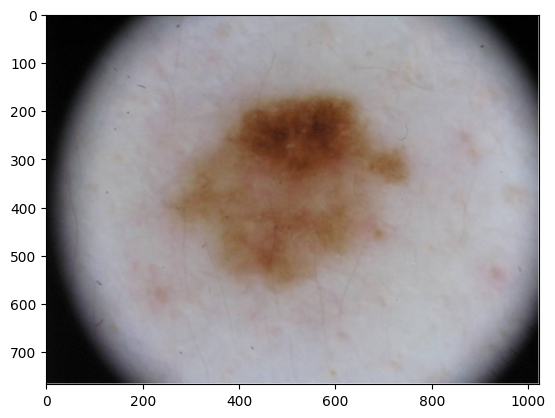

In [11]:
img= mpimg.imread(image_data+file_names[10])
plt.imshow(img)
print(img.shape)


(768, 1024, 3)


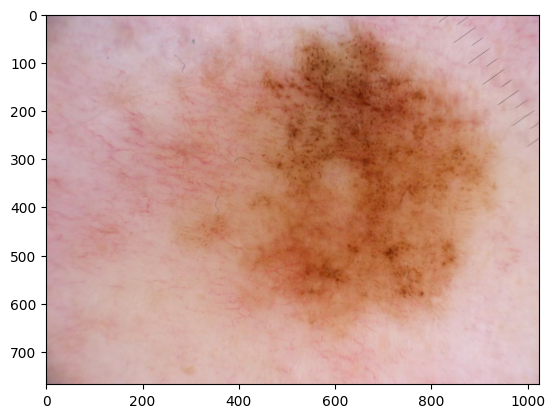

In [12]:
img= mpimg.imread(image_data+file_names[140])
plt.imshow(img)
print(img.shape)


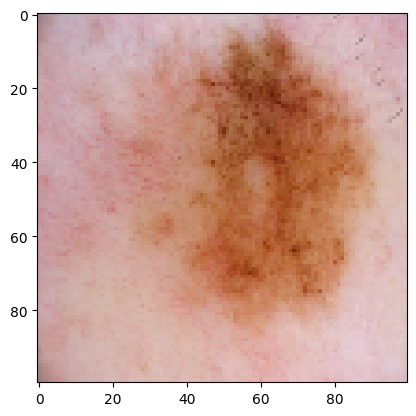

In [13]:
resized=cv2.resize(img,(100,100))
plt.imshow(resized)

All images are not of same size

Images can't be converted to grayscale

768*1024 will require high computational resources

We will resize all images to 224*224

In [14]:
def add_jpg(path:str):
    if(path.endswith(".jpg")):
        return path
    return path+".jpg"

In [15]:
#  check if image endswith .jpg in df_csv
df_csv["image"]= df_csv["image"].apply(add_jpg)
df_csv.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This dataset contains the training data for the ISIC 2019 challenge, note that it already includes data from previous years (2018 and 2017).

The dataset for ISIC 2019 contains 25,331 images available for the classification of dermoscopic images among nine different diagnostic categories:

    Melanoma
    Melanocytic nevus
    Basal cell carcinoma
    Actinic keratosis
    Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
    Dermatofibroma
    Vascular lesion
    Squamous cell carcinoma
    None of the above

In [16]:
#  check if image endswith .jpg in df_meta
df_meta["image"]= df_meta["image"].apply(add_jpg)
df_meta.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000.jpg,55.0,anterior torso,NaN,female
1,ISIC_0000001.jpg,30.0,anterior torso,NaN,female
2,ISIC_0000002.jpg,60.0,upper extremity,NaN,female
3,ISIC_0000003.jpg,30.0,upper extremity,NaN,male
4,ISIC_0000004.jpg,80.0,posterior torso,NaN,male


In [17]:
# percentage of missing values
df_meta.isnull().sum()/len(df_meta)

image                  0.000000
age_approx             0.017252
anatom_site_general    0.103865
lesion_id              0.082271
sex                    0.015159
dtype: float64

# Looking into data to handle missing values

In [18]:
df_meta["age_approx"].describe()

count    24894.000000
mean        54.028481
std         18.130971
min          0.000000
25%         40.000000
50%         55.000000
75%         70.000000
max         85.000000
Name: age_approx, dtype: float64

In [19]:
# merge df_csv and df_meta

df= pd.merge(df_csv,df_meta,on="image")
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,anterior torso,NaN,female
1,ISIC_0000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female
2,ISIC_0000002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,upper extremity,NaN,female
3,ISIC_0000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,upper extremity,NaN,male
4,ISIC_0000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,posterior torso,NaN,male


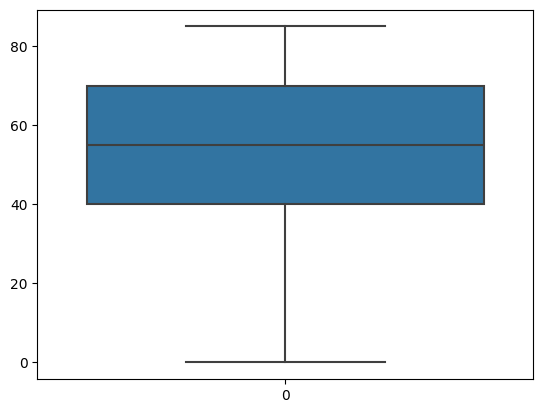

In [20]:
# plot boxplot for age_approx
sns.boxplot(df["age_approx"])
plt.show()

In [21]:
df.isnull().sum()

image                     0
MEL                       0
NV                        0
BCC                       0
AK                        0
BKL                       0
DF                        0
VASC                      0
SCC                       0
UNK                       0
age_approx              437
anatom_site_general    2631
lesion_id              2084
sex                     384
dtype: int64

In [22]:
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,anterior torso,NaN,female
1,ISIC_0000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female
2,ISIC_0000002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,upper extremity,NaN,female
3,ISIC_0000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,upper extremity,NaN,male
4,ISIC_0000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,posterior torso,NaN,male


In [23]:
# feature engineer skin_condition by finding argmax among cols of df_csv

df["skin_condition"]= df_csv.iloc[:,1:].idxmax(axis=1)

In [24]:
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,age_approx,anatom_site_general,lesion_id,sex,skin_condition
0,ISIC_0000000.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,anterior torso,NaN,female,NV
1,ISIC_0000001.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,anterior torso,NaN,female,NV
2,ISIC_0000002.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,upper extremity,NaN,female,MEL
3,ISIC_0000003.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,upper extremity,NaN,male,NV
4,ISIC_0000004.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,posterior torso,NaN,male,MEL


In [25]:
# drop
col=["MEL","NV","BCC","AK","BKL","DF","VASC","SCC","UNK"]
df.drop(col,axis=1,inplace=True)
df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,skin_condition
0,ISIC_0000000.jpg,55.0,anterior torso,NaN,female,NV
1,ISIC_0000001.jpg,30.0,anterior torso,NaN,female,NV
2,ISIC_0000002.jpg,60.0,upper extremity,NaN,female,MEL
3,ISIC_0000003.jpg,30.0,upper extremity,NaN,male,NV
4,ISIC_0000004.jpg,80.0,posterior torso,NaN,male,MEL


In [26]:
df.groupby("skin_condition").describe()

age_approx                                                    
                    count       mean        std   min   25%   50%   75%   max
skin_condition                                                               
AK                  864.0  67.280093  12.398287  10.0  60.0  70.0  75.0  85.0
BCC                3317.0  65.731082  14.756795  10.0  55.0  70.0  80.0  85.0
BKL                2598.0  63.668206  14.502957   0.0  55.0  65.0  75.0  85.0
DF                  239.0  51.694561  15.406086  15.0  40.0  50.0  65.0  85.0
MEL                4437.0  60.720081  15.601657   5.0  50.0  60.0  75.0  85.0
NV                12558.0  44.888517  15.955521   0.0  35.0  45.0  55.0  85.0
SCC                 628.0  70.804140  11.104758  35.0  65.0  70.0  80.0  85.0
VASC                253.0  53.241107  19.764716   0.0  40.0  55.0  70.0  85.0

In [27]:
# replace age as median wrt to group_by of skin_condition

df["age_approx"]= df.groupby("skin_condition")["age_approx"].transform(lambda x: x.fillna(x.median()))

In [28]:
df["age_approx"].isnull().sum()

0

In [29]:
# drop lesion id

df.drop("lesion_id",axis=1,inplace=True)

In [30]:
df.groupby("skin_condition")["anatom_site_general"].value_counts()

skin_condition  anatom_site_general
AK              head/neck               598
                anterior torso           92
                upper extremity          79
                lower extremity          66
                palms/soles               6
                posterior torso           4
BCC             head/neck              1131
                anterior torso         1114
                lower extremity         462
                upper extremity         358
                posterior torso         186
BKL             head/neck              1001
                anterior torso          445
                lower extremity         412
                upper extremity         234
                posterior torso         230
                oral/genital             14
                palms/soles               7
                lateral torso             6
DF              lower extremity         138
                upper extremity          52
                anterior torso          

In [31]:
df.groupby("skin_condition")["anatom_site_general"].value_counts()["AK"].max()

598

    skin_condition  anatom_site_general

    AK              head/neck               598
                    anterior torso           92
                    upper extremity          79
                    lower extremity          66
                    palms/soles               6
                    posterior torso           4

    BCC             head/neck              1131
                    anterior torso         1114
                    lower extremity         462
                    upper extremity         358
                    posterior torso         186

    BKL             head/neck              1001
                    anterior torso          445
                    lower extremity         412
                    upper extremity         234
                    posterior torso         230
                    oral/genital             14
                    palms/soles               7
                    lateral torso             6

    DF              lower extremity         138
                    upper extremity          52
                    anterior torso           43
                    posterior torso           2

    MEL             anterior torso         1331
                    head/neck               880
                    lower extremity         796
                    upper extremity         724
                    posterior torso         430
                    palms/soles             201
                    oral/genital             19
                    lateral torso            14

    NV              anterior torso         3699
                    lower extremity        2876
                    posterior torso        1888
                    upper extremity        1325
                    head/neck               767
                    palms/soles             168
                    lateral torso            34
                    oral/genital             24

    SCC             lower extremity         182
                    head/neck               174
                    upper extremity         115
                    anterior torso          113
                    posterior torso          25
                    palms/soles              13

    VASC            anterior torso           78
                    lower extremity          58
                    head/neck                36
                    upper extremity          23
                    posterior torso          22
                    palms/soles               3
                    oral/genital              2
                    
Name: count, dtype: int64

In [32]:
# replace by value_counts max value per class

df["anatom_site_general"]= df.groupby("skin_condition")["anatom_site_general"].transform(lambda x: x.fillna(x.value_counts().idxmax()))

In [33]:
df.groupby("skin_condition")["anatom_site_general"].value_counts()

skin_condition  anatom_site_general
AK              head/neck               620
                anterior torso           92
                upper extremity          79
                lower extremity          66
                palms/soles               6
                posterior torso           4
BCC             head/neck              1203
                anterior torso         1114
                lower extremity         462
                upper extremity         358
                posterior torso         186
BKL             head/neck              1276
                anterior torso          445
                lower extremity         412
                upper extremity         234
                posterior torso         230
                oral/genital             14
                palms/soles               7
                lateral torso             6
DF              lower extremity         142
                upper extremity          52
                anterior torso          

In [34]:
df["anatom_site_general"].isnull().sum()

0

In [35]:
df["sex"].value_counts()

sex
male      13286
female    11661
Name: count, dtype: int64

In [36]:
df.groupby("skin_condition")["sex"].value_counts()

skin_condition  sex   
AK              male       458
                female     406
BCC             male      2000
                female    1317
BKL             male      1467
                female    1134
DF              male       122
                female     117
MEL             male      2461
                female    1980
NV              female    6379
                male      6225
SCC             male       425
                female     203
VASC            male       128
                female     125
Name: count, dtype: int64

In [37]:
# replace sex by majority per class
df['sex'] = df.groupby('skin_condition')['sex'].transform(lambda x:x.fillna(x.value_counts().idxmax()))

In [38]:
df["sex"].value_counts()

sex
male      13399
female    11932
Name: count, dtype: int64

In [39]:
df.isnull().sum()

image                  0
age_approx             0
anatom_site_general    0
sex                    0
skin_condition         0
dtype: int64

# Data Preprocessing

In [40]:
# Map integer numbers to Nominal data with max class as priority
# anatom_site_general
# anterior torso     9167
# lower extremity    5000
# head/neck          4956
# upper extremity    2910
# posterior torso    2787
# palms/soles         398
# oral/genital         59
# lateral torso        54

df["anatom_site_general"]= df["anatom_site_general"].map({
    "anterior torso":7,
    "lower extremity":6,
    "head/neck":5,
    "upper extremity":4,
    "posterior torso":3,
    "palms/soles":2,
    "oral/genital":1,
    "lateral torso":0
})


In [41]:
# Map integer numbers to Nominal data with max class as priority
# male      13399
# female    11932

df["sex"]=df["sex"].map({
    "female":0,
    "male":1
})

In [42]:
# Map integer numbers to Nominal data with max class as priority
# NV      12875
# MEL      4522
# BCC      3323
# BKL      2624
# AK        867
# SCC       628
# VASC      253
# DF        239
 

df["skin_condition"]=df["skin_condition"].map({
    "NV":7,
    "MEL":6,
    "BCC":5,
    "BKL":4,
    "AK":3,
    "SCC":2,
    "VASC":1,
    "DF":0
})


In [43]:
df.head()

,image,age_approx,anatom_site_general,sex,skin_condition
0,ISIC_0000000.jpg,55.0,7,0,7
1,ISIC_0000001.jpg,30.0,7,0,7
2,ISIC_0000002.jpg,60.0,4,0,6
3,ISIC_0000003.jpg,30.0,4,1,7
4,ISIC_0000004.jpg,80.0,3,1,6


Save df

In [44]:

df.isnull().sum()

image                  0
age_approx             0
anatom_site_general    0
sex                    0
skin_condition         0
dtype: int64

In [45]:
# save df

df.to_csv("df.csv",index=False)